# Softmax Regression

* Softmax regression is a method, which generalizes Logistic regression.
* It is used for multi-class classification.

Working Of softmax regression is depicted in the following figure.
* For k class labels, the input feature vector goes through k different linear one per each class label.
* These k values are passed through softmax activation, which returns a probability containing k components.

The i-th component denotes probability of an input sample belonging to class label i.\
The softmax classifier is trained with a **cross entropy loss**, which is based on the actual labels and predicted labels.\
Note that the are represented with `one-hot-encoding`.


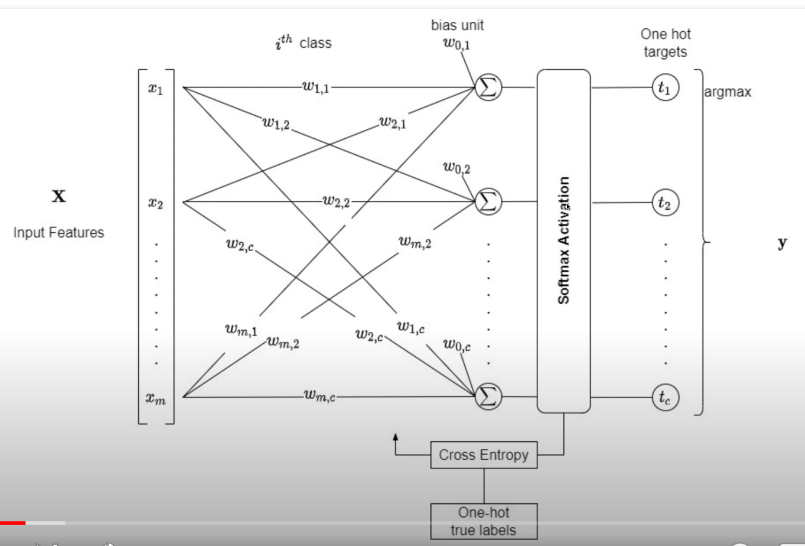

As usual we will list down five components of the softmax regression classifier:
* Training data
* Model
* Loss function
Optimization procedure
* Model evaluation


In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

##Training data
The training data contains:
* Feature matrix
* (one Of $k$ labels)

For the purpose of this illustration, we will be using MNIST hand-written digit dataset.\
* Each input is in form of a **28 X 28** image of a single handwritten digit.
* Each image is labeled with digit present in it. There are 10 digits in all and hence 10 total classes: [0, 1, 2,...,9]\
Lets load the dataset and quickly examine it.


In [ ]:
(train_x , train_y), (test_x, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


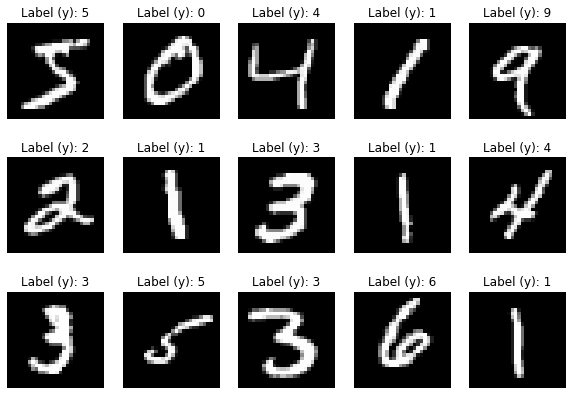

In [ ]:
plt.figure(figsize = (10,7))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(train_x[i], cmap = 'gray')
  plt.title('Label (y): {}'.format(train_y[i]))
  plt.axis('off')
plt.show()  

In [ ]:
X_train =train_x.reshape(train_x.shape[0],28*28)#flatten the $28 X 28 matrix into 784 column
X_train.shape
X_test =test_x.reshape(test_x.shape[0],28*28)

#Each pixel values between 0 to 255. We scale each value by dividing by 255 

X_train = X_train/255 
X_test = X_test/255

for softmax regression, label vector **y** need to be represented in **one-hot encoding**

In [ ]:
def convert_to_one_hot_coding(y,k):
  one_hot = np.zeros((len(y),k))

  one_hot[np.arange(len(y)),y] = 1
  return one_hot


In [ ]:
y = np.array([1,2,1])
convert_to_one_hot_coding(y,3)

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

#Model

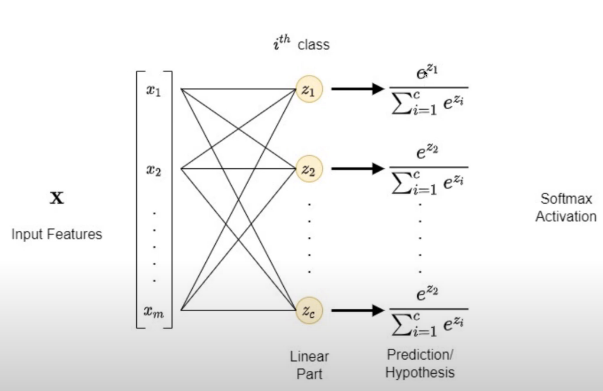

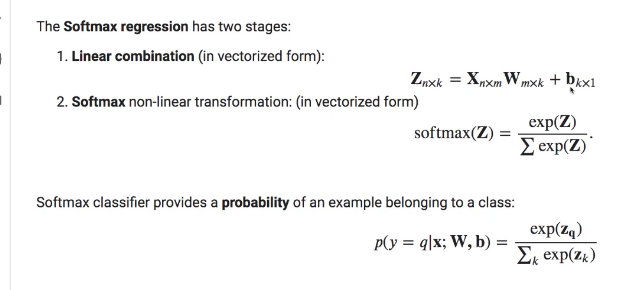

##Softmax Regression implementation



**Step 1**: In vectorized form we implement: **$Z = XW + b$**.
Each class has $m + 1$ parameters, one bias and m weights corresponding to $m$ features.

In [ ]:
def linear_combination(X,w,b):
  return X @ w + b

**Step 2**: Calculate the softmax for each class using the formula.


> * The sum of softmax across all classes for a given sample is 1.
* The class label with the highest value of softmax is assigned to the sample.


Note: Every class has a different set of weights and a bias.


In [ ]:
def softmax(z):
  # z--> linear part
  # Subtracting the max of z for numerical stability
  exp = np.exp(z - np.max(z))   

  

  #Calculate softmax for all samples;
  for i in range(len(z)):
    exp[i] /= np.sum(exp[i])
  
  return exp

y_pred = np.argmax(y_hat ,axis = 1)

y_pred[np.where(y_pred < T)] = -1

NameError: ignored

##Loss Function :Categorical Cross Entropy Loss

For softmax regression, we use the cross-entropy(CE) loss.\
For any pair of label vectors $y$  and model prediction over k classes, the loss function J is given as

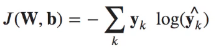


## Optimization

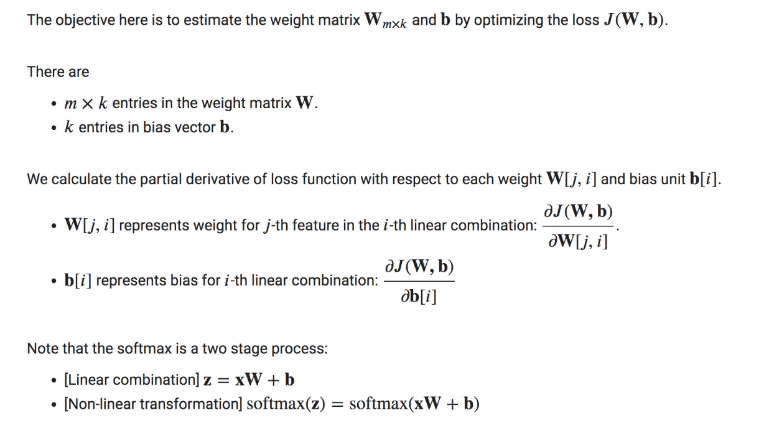

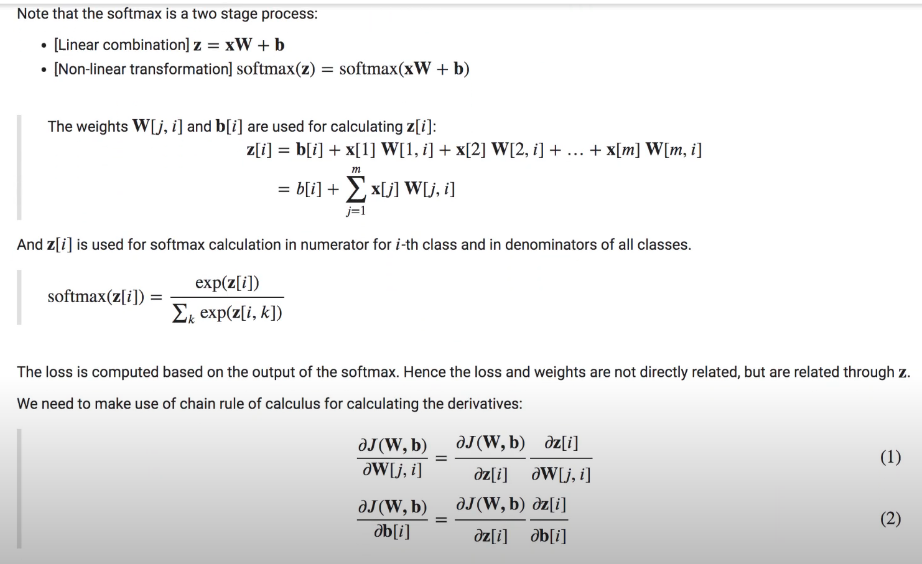

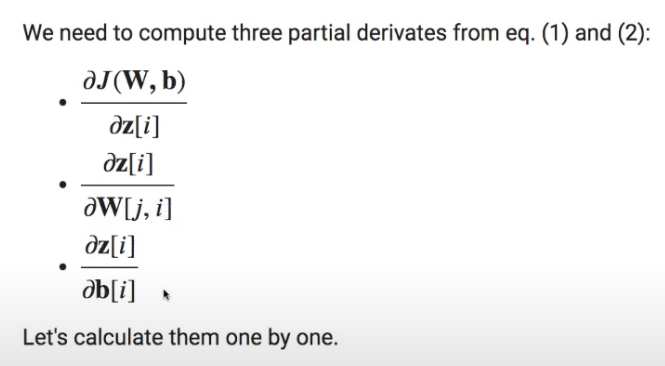

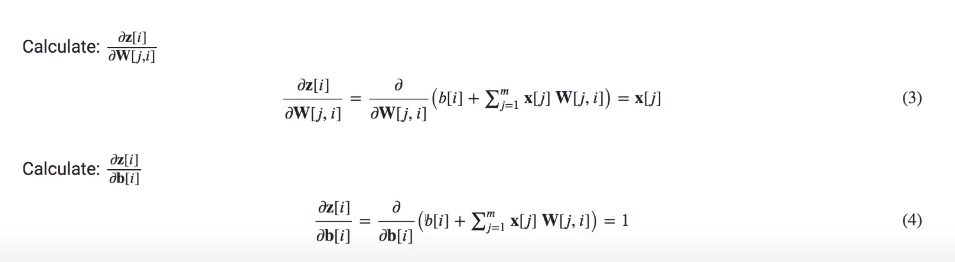

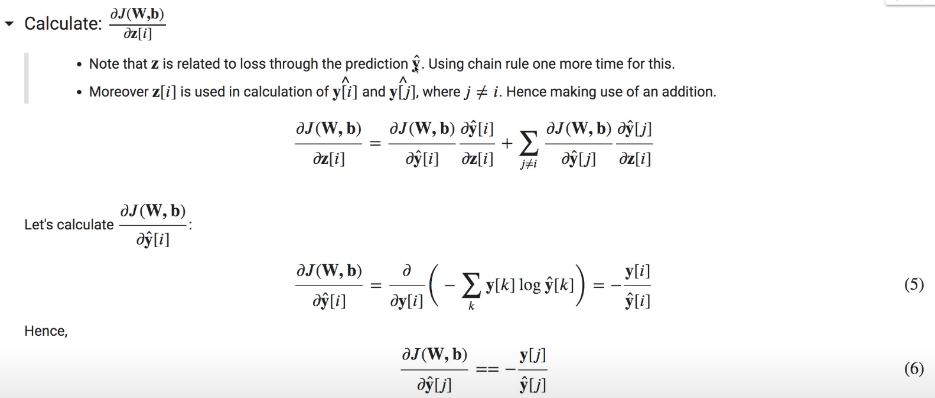

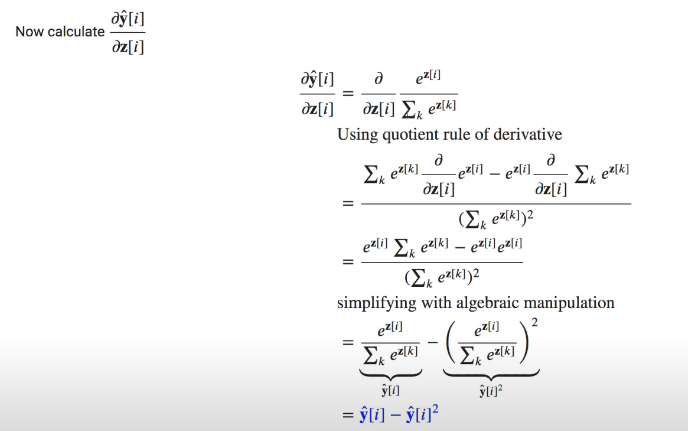

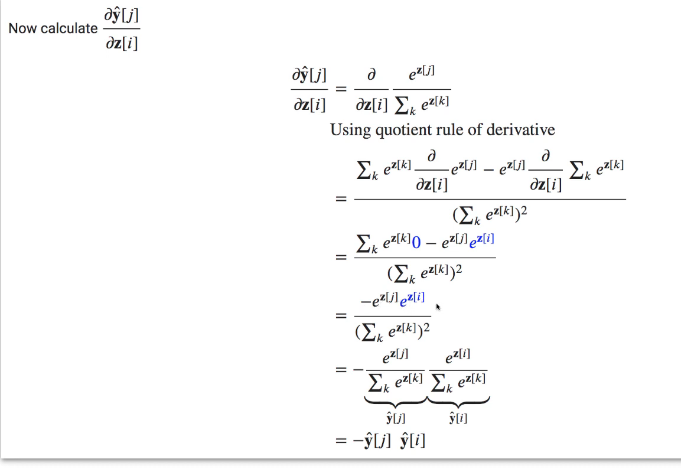

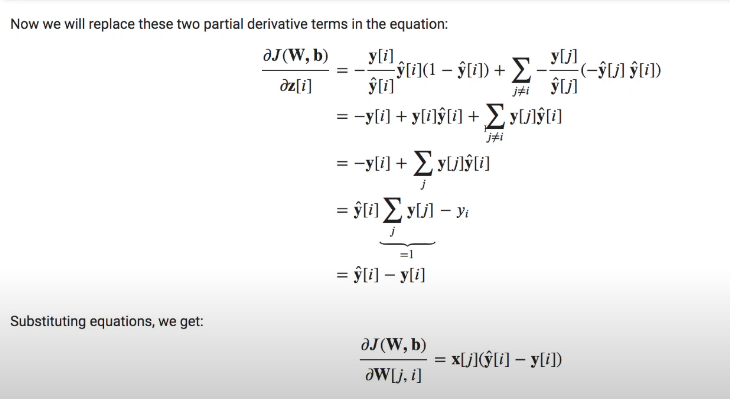


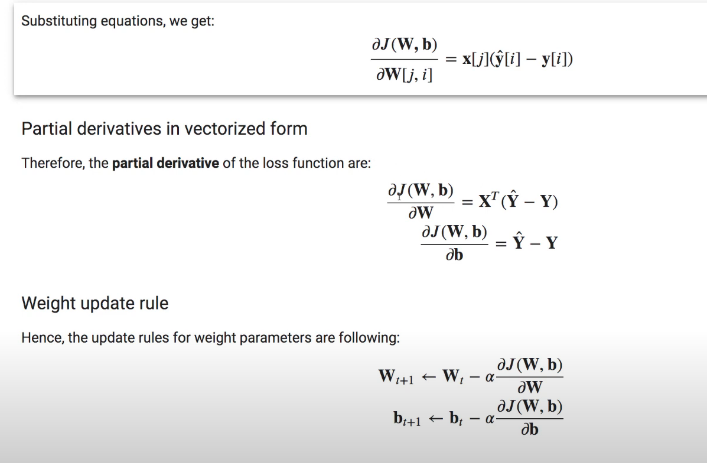

## Training

1. Initialize parameters: w and b .
2. Find optimal w and b using Gradient Descent.
3. Use softmax(w.x + b) to predict.


In [ ]:
def fit(X, y, lr, c, epochs):
  # X --> input
  # y --> Target/ response variable
  # lr --> Learning rate
  # c --> Number of classes
  # epochs --> number of iterations

  # m is no. of training examples
  # n is no. features

  n,m = X.shape

  # Initializing weights and bias randomly
  w = np.random.random((m,c))
  b = np.random.random(c)

  #intializing a list to store losses
  losses = []

  # start the loop
  for epoch in range(epochs):
    z = X @ w  + b
    #calculate the prediction

    y_hat = softmax(z)

    # convert labels to one hot
    y_hot = convert_to_one_hot_coding(y,c)

    #calculate both the gradients
    w_grad = (1/n)* np.dot(X.T, y_hat - y_hot)
    b_grad = (1/n)* np.sum(y_hat - y_hot)

    #updating the parameters

    w  = w - lr* w_grad
    b = b - lr * b_grad

    #appen loss
    loss = -1 * np.mean(np.log(y_hat[np.arange(len(y)),y]))
    losses.append(loss)

    if epoch % 10 ==0:
      print('loss for epoch {0} is {1}'.format(epoch,loss))
  return w , b, losses

def predict(X,w,b):
  z = X @ w + b
  y_hat = softmax(z)
  y_pred = np.argmax(y_hat ,axis = 1)

  y_pred[np.where(y_pred < T)] = -1
  return y_pred

def accuracy(y,y_hat):
  return np.sum(y == y_hat)/len(y)



In [ ]:
y_hat = np.array([[0.1,0.2,0.7],[0.2,0.3,0.5],[0.1,0.1,0.8]])
y_max = np.max(y_hat ,axis = 1)
y_pred = np.argmax(y_hat,axis = 1)
T = 0.6
y_pred[np.where(y_max < T)] = -1
y_pred

array([ 2, -1,  2])

## Training Digit Recognizer on MNIST dataset

In [ ]:
# training
w, b, l = fit(X_train, train_y, lr = 0.9, c = 10 ,epochs = 100)


loss for epoch 0 is 4.3066943816705345
loss for epoch 10 is 1.073335492371507
loss for epoch 20 is 0.6943554252744049
loss for epoch 30 is 0.5643461639797313
loss for epoch 40 is 0.5157900578255259
loss for epoch 50 is 0.48420703145233934
loss for epoch 60 is 0.46133947735039155
loss for epoch 70 is 0.44380163654607835
loss for epoch 80 is 0.4297987052690452
loss for epoch 90 is 0.4182811751653585


In [ ]:
w.shape

(784, 10)

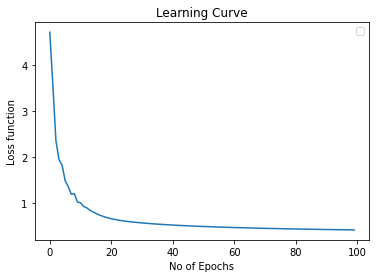

In [ ]:
#Learning curve 

plt.figure() 
plt.title('Learning Curve')
plt.legend('Training Epochs') 
plt.xlabel('No of Epochs')
plt.ylabel('Loss function')
plt.plot(np.arange(len(l)),l)
plt.show()

In [ ]:
#Accuracy for test set 
test_preds = predict(X_test,w,b) 
print(test_preds)

Accuracy for test set: 0.8837


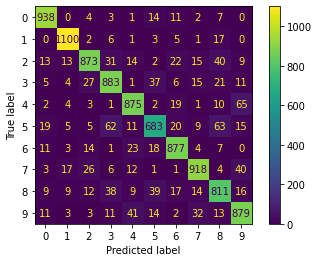

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay 
cm_display = ConfusionMatrixDisplay.from_predictions(test_y, test_preds)
cm_display

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(test_y, test_preds))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       980
           1       0.95      0.97      0.96      1135
           2       0.90      0.85      0.87      1032
           3       0.85      0.87      0.86      1010
           4       0.89      0.89      0.89       982
           5       0.84      0.77      0.80       892
           6       0.89      0.92      0.91       958
           7       0.91      0.89      0.90      1028
           8       0.82      0.83      0.82       974
           9       0.85      0.87      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 


In [ ]:
print('F1 score :', f1_score(test_y,test_preds, average='micro'))
print('precision score :', precision_score(test_y,test_preds, average='micro'))
print('recall score :', recall_score(test_y,test_preds, average='micro'))

F1 score : 0.8837
precision score : 0.8837
recall score : 0.8837


In [ ]:
print('F1 score :', f1_score(test_y,test_preds, average='macro'))
print('precision score :', precision_score(test_y,test_preds, average='macro'))
print('recall score :', recall_score(test_y,test_preds, average='macro'))

F1 score : 0.8814549682386937
precision score : 0.8820673670485357
recall score : 0.8815480670125713


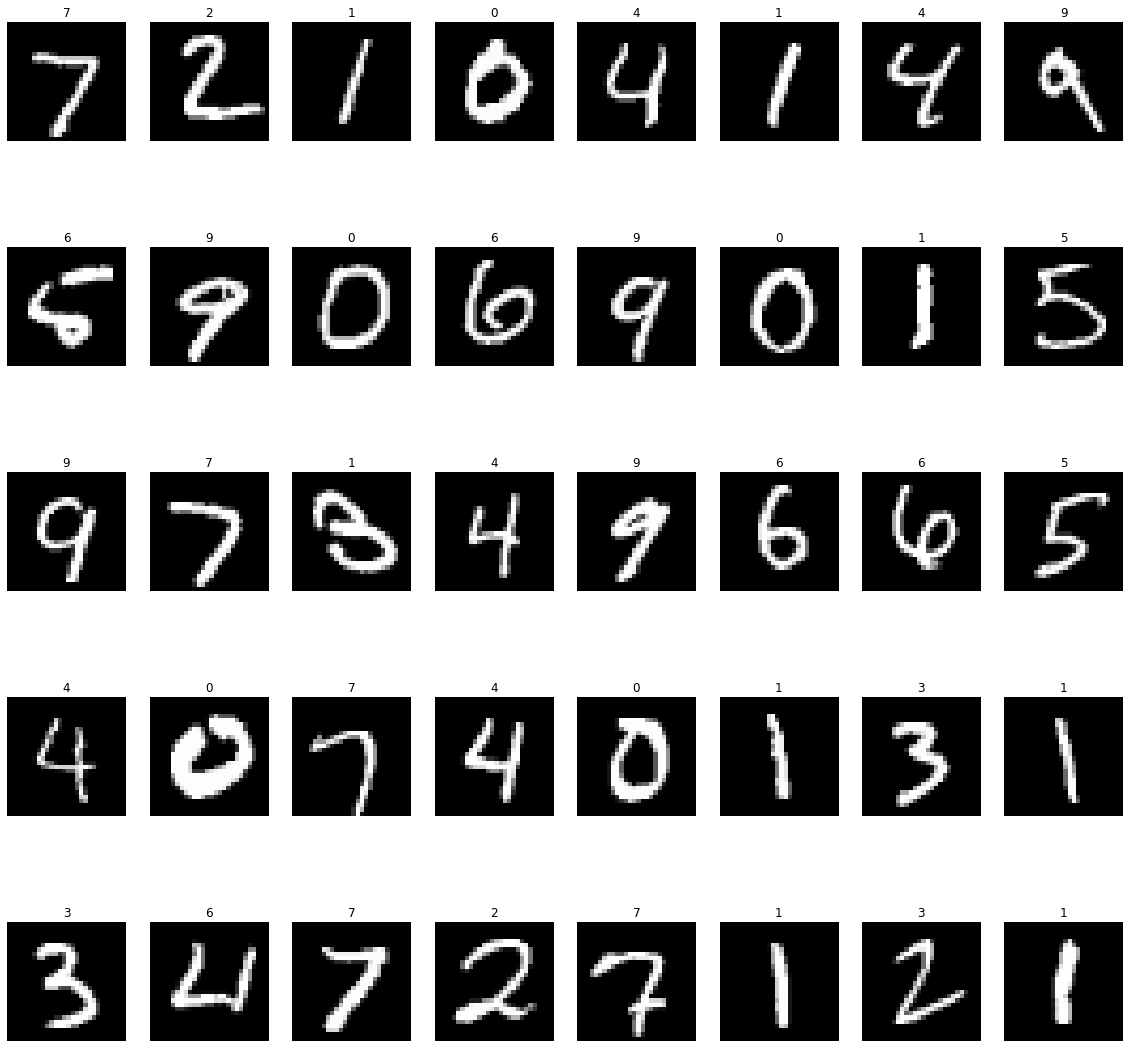

In [ ]:
plt.figure(figsize=(20,20))
for i in range(40):
  plt.subplot(5,8,i+1)
  plt.imshow(test_x[i],cmap='gray')
  plt.title(test_preds[i])
  plt.axis('off')
plt.show()

#K NN 

K Nearest Neighbours (k-NN)
k-NN does not have a model. It stores all examples in the training set.
For a given value of k and selected distance metric, k-NN uses the following steps to assign label to the new example:
I . Find the distance between the new example to all other examples in the training set.
2. Select the enearest examples and get their labels.
k-NN technique can be used in both classification and regression problems.
• For classification task, assign the label taken by the majority of k nearest neighbours.
• For regression task, take the average of the output label and assign it to the new example.
In this colab, we will implement k-NN from scratch.
• distance calculation and
• nearest neighbour based label or output assignment.
Let's begin by importing required libraries


In [ ]:
#GRPA 3
import numpy as np
def Euclidean(X,newvector):
    return np.sum(np.power((X-newvector),2),axis = 1)

def knn(class1,class2,x_new):
    dist1 = Euclidean(class1,x_new)
    dist1 = np.sort(dist1)
    dist2 = Euclidean(class2, x_new)
    dist2 = np.sort(dist2)
    
    if dist1[2] < dist2[2]:
        return 1
    else:
        return 2
    

class1 = np.array([[1,2],[1,-1],[1,0],[0,2],[0,4]])
class2 = np.array([[2,1],[0,0],[2,3],[4,4],[4,1]])
x_new = np.array([[1,2]])

print(knn(class1,class2,x_new))